## Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## DATA PREPROCESSING

In [12]:
df = pd.read_csv('Advertising.csv')
df= df[['TV' , 'Radio' , 'Newspaper' , 'Sales']]

nu = df.isnull().sum()
dup = df.duplicated().sum()

print(nu, dup)


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64 0


## Data Scalling And Splitimg

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = ss.fit_transform(df)
df = pd.DataFrame(df , columns=['TV' , 'Radio' , 'Newspaper' , 'Sales'])

x = df[['TV' , 'Radio' , 'Newspaper']]
y = df['Sales']

## DATA VISUALISATION

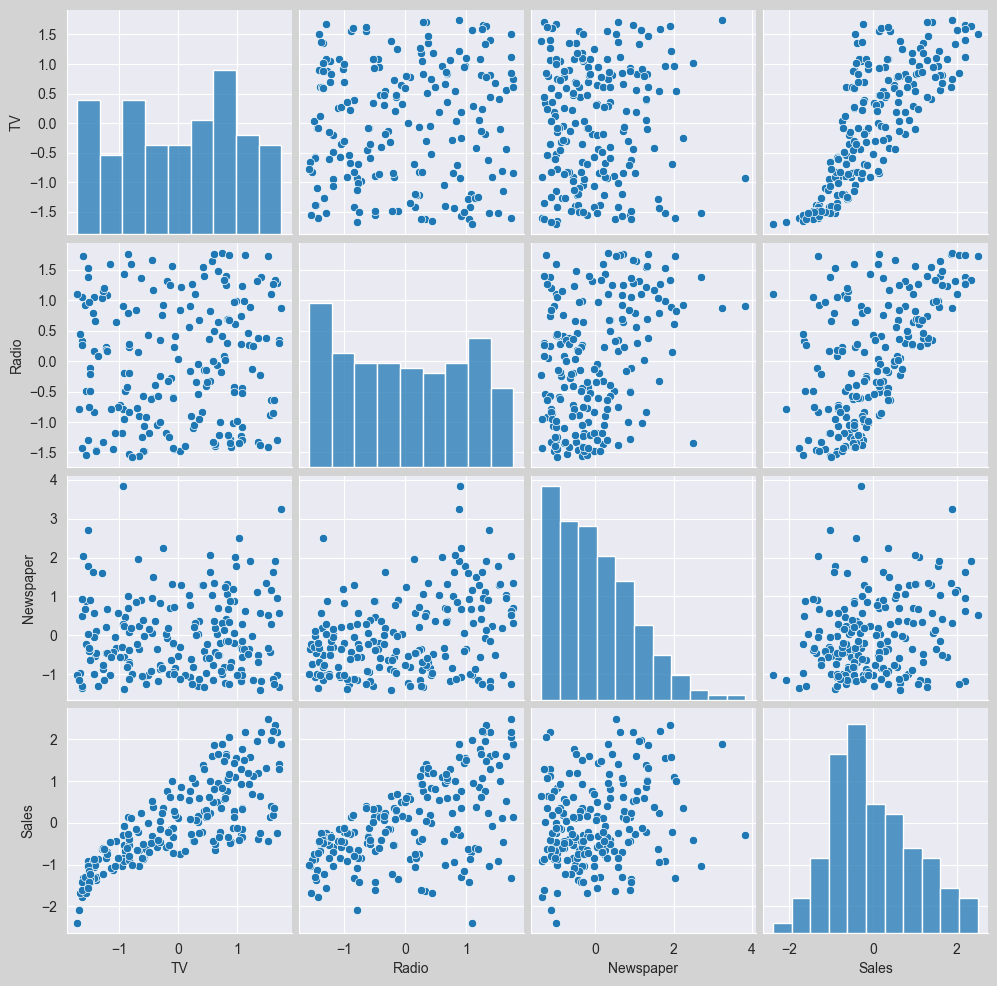

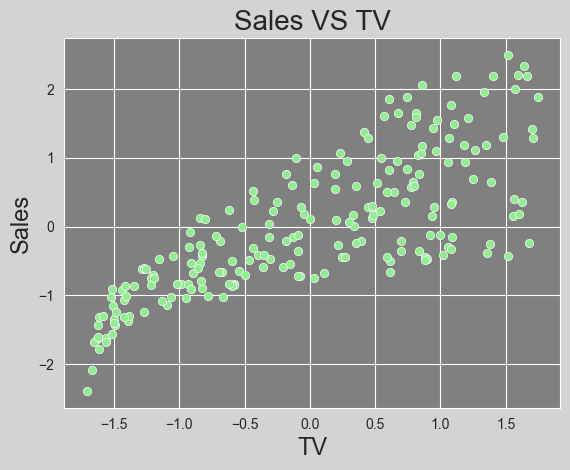

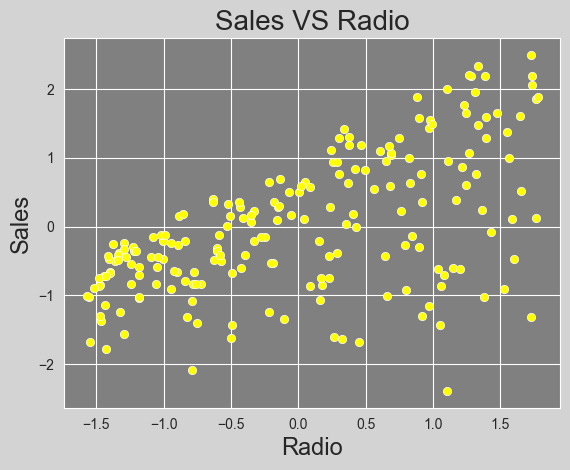

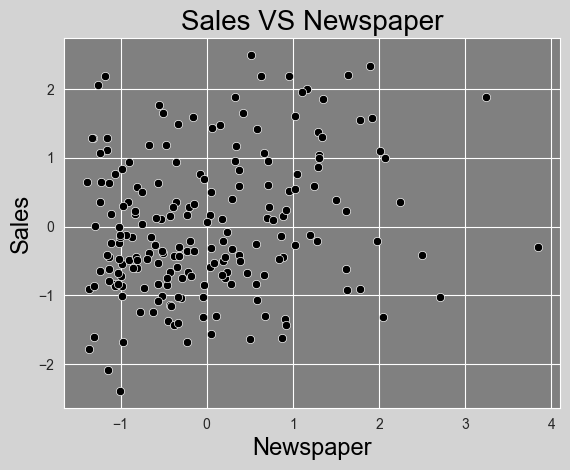

In [14]:

sns.set_style("darkgrid")
sns.pairplot(df )
plt.gcf().set_facecolor('lightgray')  # Change the figure background color
plt.gca().set_facecolor('gray')       # Change the axes background color

plt.show()

print()
print()
sns.set_style("darkgrid")
sns.scatterplot(x = x['TV'] , y = y , data = df ,color = 'lightgreen' ) 
plt.gcf().set_facecolor('lightgray')  # Change the figure background color
plt.gca().set_facecolor('gray')       # Change the axes background color
plt.xlabel('TV' , fontsize = 17)
plt.ylabel('Sales' , fontsize = 17)
plt.title('Sales VS TV' , fontsize = 20 )
plt.show()

print()
print()

sns.set_style("darkgrid")
sns.scatterplot(x = x['Radio'] , y = y , data = df ,color = 'yellow' ) 
plt.gcf().set_facecolor('lightgray')  # Change the figure background color
plt.gca().set_facecolor('gray')       # Change the axes background color
plt.xlabel('Radio' , fontsize = 17  )
plt.ylabel('Sales' , fontsize = 17 )
plt.title('Sales VS Radio' , fontsize = 20 )
plt.show()

print()
print()
sns.set_style("darkgrid")
sns.scatterplot(x = x['Newspaper'] , y = y , data = df ,color = 'black' ) 
plt.gcf().set_facecolor('lightgray')  # Change the figure background color
plt.gca().set_facecolor('gray')       # Change the axes background color
plt.xlabel('Newspaper' , fontsize = 17 , color = 'black')
plt.ylabel('Sales' , fontsize = 17 , color = 'black')
plt.title('Sales VS Newspaper' , fontsize = 20 , color = 'black' )
plt.show()

## Train Test Split And Model Selection

In [15]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0)

from sklearn.ensemble import RandomForestRegressor


## Hyper Parameter Tuining

In [16]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [100,130,150],
    'max_depth' : [7,10],
    'random_state':[0,42]
}
clf = GridSearchCV(RandomForestRegressor() ,params , cv=5 , return_train_score=False )
clf.fit(x_train , y_train)
df1 = pd.DataFrame(clf.cv_results_)
print(df1[['param_max_depth' , 'param_n_estimators' ,'param_random_state','mean_test_score']])
print()
print()
print("Best Parameters : " , clf.best_params_)
print("Best Scores :", clf.best_score_)

    param_max_depth  param_n_estimators  param_random_state  mean_test_score
0                 7                 100                   0         0.973581
1                 7                 100                  42         0.973418
2                 7                 130                   0         0.973975
3                 7                 130                  42         0.973054
4                 7                 150                   0         0.974068
5                 7                 150                  42         0.973544
6                10                 100                   0         0.973858
7                10                 100                  42         0.973387
8                10                 130                   0         0.974190
9                10                 130                  42         0.973051
10               10                 150                   0         0.974212
11               10                 150                  42         0.973687

## Creating the model and setting the hyperparameters

In [19]:
rg = RandomForestRegressor(n_estimators=150 , max_depth=10 , random_state=0)
rg.fit(x_train , y_train)
pred = rg.predict(x_test)
print(pred)

[-0.64723055 -0.89672046 -0.91259379  2.09672082 -0.28408673 -0.96968654
 -1.29515495 -0.2506466  -1.08328281  0.45681462  2.00899585 -0.73325397
 -0.63174151  0.22987188 -0.46157021 -0.30361082  0.34994131 -1.62718192
 -0.14971316  0.6021362   2.12823264 -0.6886165   0.32155505 -0.18693596
 -1.01584944  0.11499892 -0.02820113  1.49590402 -0.51913372 -1.22931318
 -0.36459558  1.62344576  0.25409926  1.6169235  -1.48653161 -1.39507047
 -0.79232917  0.05844418 -0.27234452 -1.31020633]


## Checking our model accuracy by checking :  mean squarred error , mean absolute error , r2_score .

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
ms = mean_squared_error(y_test , pred)
ma = mean_absolute_error(y_test , pred)
r = r2_score(y_test , pred)

print()
print("Mean Squarred Error :", ms)
print("Mean Absolute Error :", ma)
print("R2_score :", r)
print()


Mean Squarred Error : 0.033911868040580814
Mean Absolute Error : 0.1329559585304486
R2_score : 0.9708120621664631

